In [4]:
import plotting_plates as pp
import math
import os

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
files = ["data/"+item for item in os.listdir("data") if item.endswith('.txt')]
files

['data/Rutuja 04 06.txt',
 'data/Rutuja 04 08.txt',
 'data/Rutuja 04 09.txt',
 'data/Rutuja 04 10.txt',
 'data/Rutuja 04 28.txt',
 'data/Rutuja 04 30.txt',
 'data/Rutuja 05 03.txt',
 'data/Rutuja 05 05.txt',
 'data/Rutuja 11 02.txt']

In [7]:
df1 = pp.load_df(files[0]).apply(lambda i: i.apply(lambda j: math.log(j) if type(j) != str else None), axis=0)
print(files[0])
df2 = pp.load_df(files[1])
print(files[1])
df3 = pp.load_df(files[2])
print(files[2])
df4 = pp.load_df(files[3])

print(files[3])
df5 = pp.load_df(files[4])
print(files[4])
df6 = pp.load_df(files[5])
print(files[5])
df7 = pp.load_df(files[6])
print(files[6])
df8 = pp.load_df(files[7])
print(files[7])
df9 = pp.load_df(files[8])
print(files[8])

data/Rutuja 04 06.txt
data/Rutuja 04 08.txt
data/Rutuja 04 09.txt
data/Rutuja 04 10.txt
data/Rutuja 04 28.txt
data/Rutuja 04 30.txt
data/Rutuja 05 03.txt
data/Rutuja 05 05.txt
data/Rutuja 11 02.txt


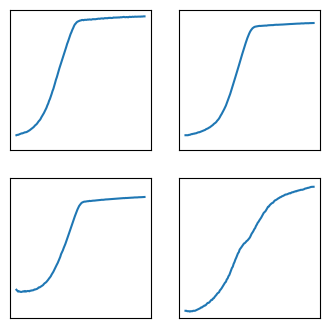

In [8]:
pp.inspect_well(df1, "K12", "H8", "L10", "A7")

In [9]:
df1.head()

,Time,T 500,A1,A2,A3,A4,A5,A6,A7,A8,...,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
0,None,None,-1.807889,-0.642454,-1.857899,-1.795767,-1.358679,-1.478410,-1.910543,-1.903809,...,-1.783791,-1.783791,-1.783791,-1.766092,-1.766092,-1.766092,-1.748700,-1.754464,-1.857899,-1.703749
1,None,None,-1.814005,-0.683197,-1.857899,-1.807889,-1.370421,-1.474033,-1.910543,-1.897120,...,-1.783791,-1.789761,-1.789761,-1.766092,-1.766092,-1.771957,-1.760261,-1.760261,-1.864330,-1.725972
2,None,None,-1.820159,-0.707246,-1.857899,-1.814005,-1.370421,-1.474033,-1.917323,-1.897120,...,-1.783791,-1.795767,-1.789761,-1.771957,-1.766092,-1.777857,-1.766092,-1.766092,-1.864330,-1.731606
3,None,None,-1.820159,-0.713350,-1.857899,-1.814005,-1.374366,-1.478410,-1.917323,-1.897120,...,-1.783791,-1.795767,-1.801810,-1.777857,-1.766092,-1.777857,-1.771957,-1.766092,-1.864330,-1.725972
4,None,None,-1.826351,-0.715393,-1.857899,-1.820159,-1.374366,-1.478410,-1.917323,-1.897120,...,-1.783791,-1.795767,-1.801810,-1.783791,-1.760261,-1.783791,-1.777857,-1.771957,-1.864330,-1.731606


In [10]:
# test_df = df1[["K12", "H8", "L10", "A7"]].apply(lambda i: i.apply(lambda j: math.log(j)), axis=0)

In [11]:
# pp.inspect_well(test_df, "K12", "H8", "L10", "A7")

In [12]:
with open("1A.txt") as f:
    string1 = f.read()
l1 = string1.split()
l1 = list(set(l1))
len(l1)

366

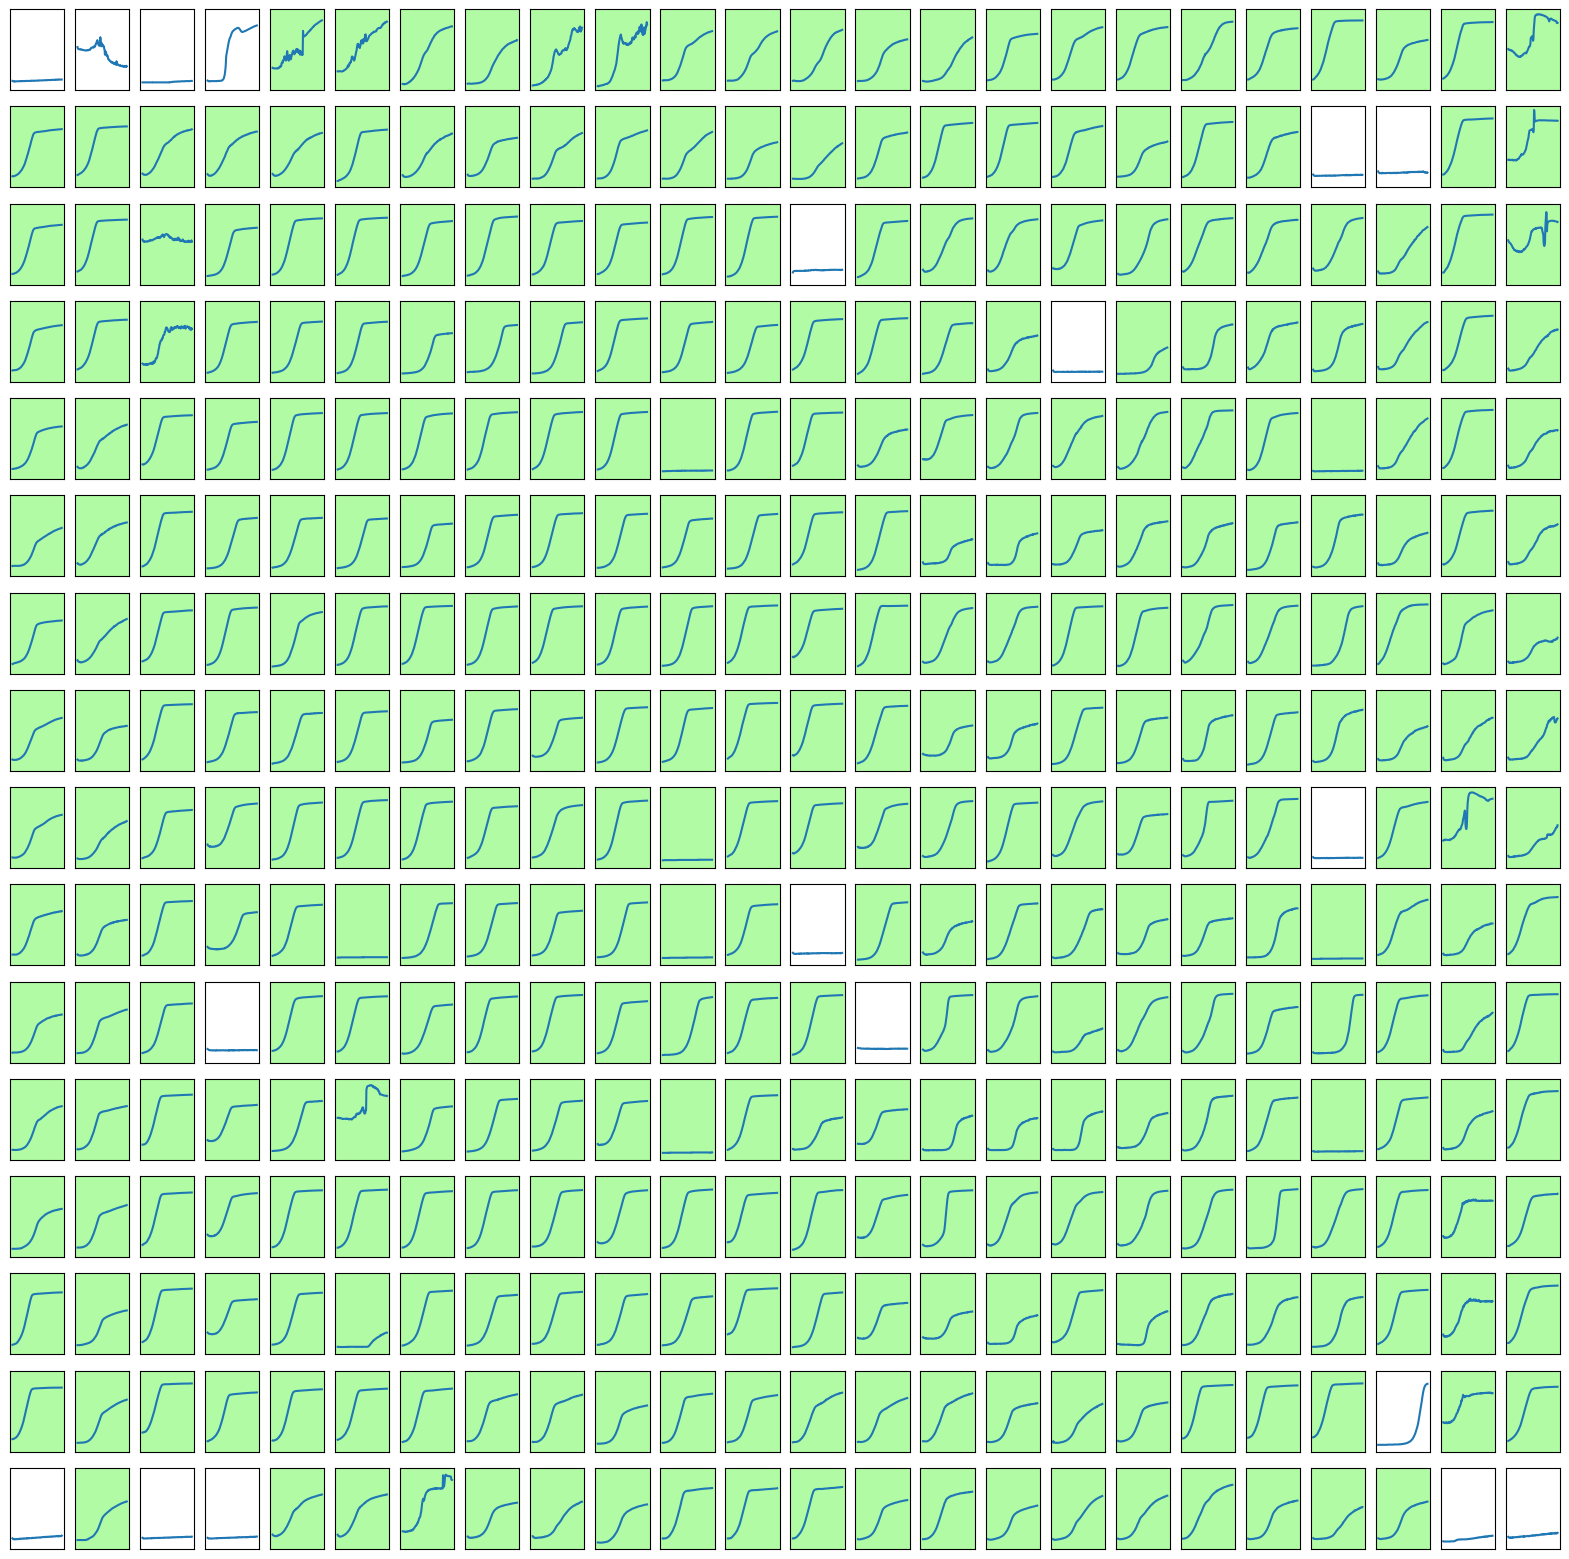

In [13]:
pp.graph_df(df1, l1)

In [14]:
with open("1B.txt") as f:
    string2 = f.read()
l2 = string2.split()
l2 = list(set(l2))
len(l2)

378

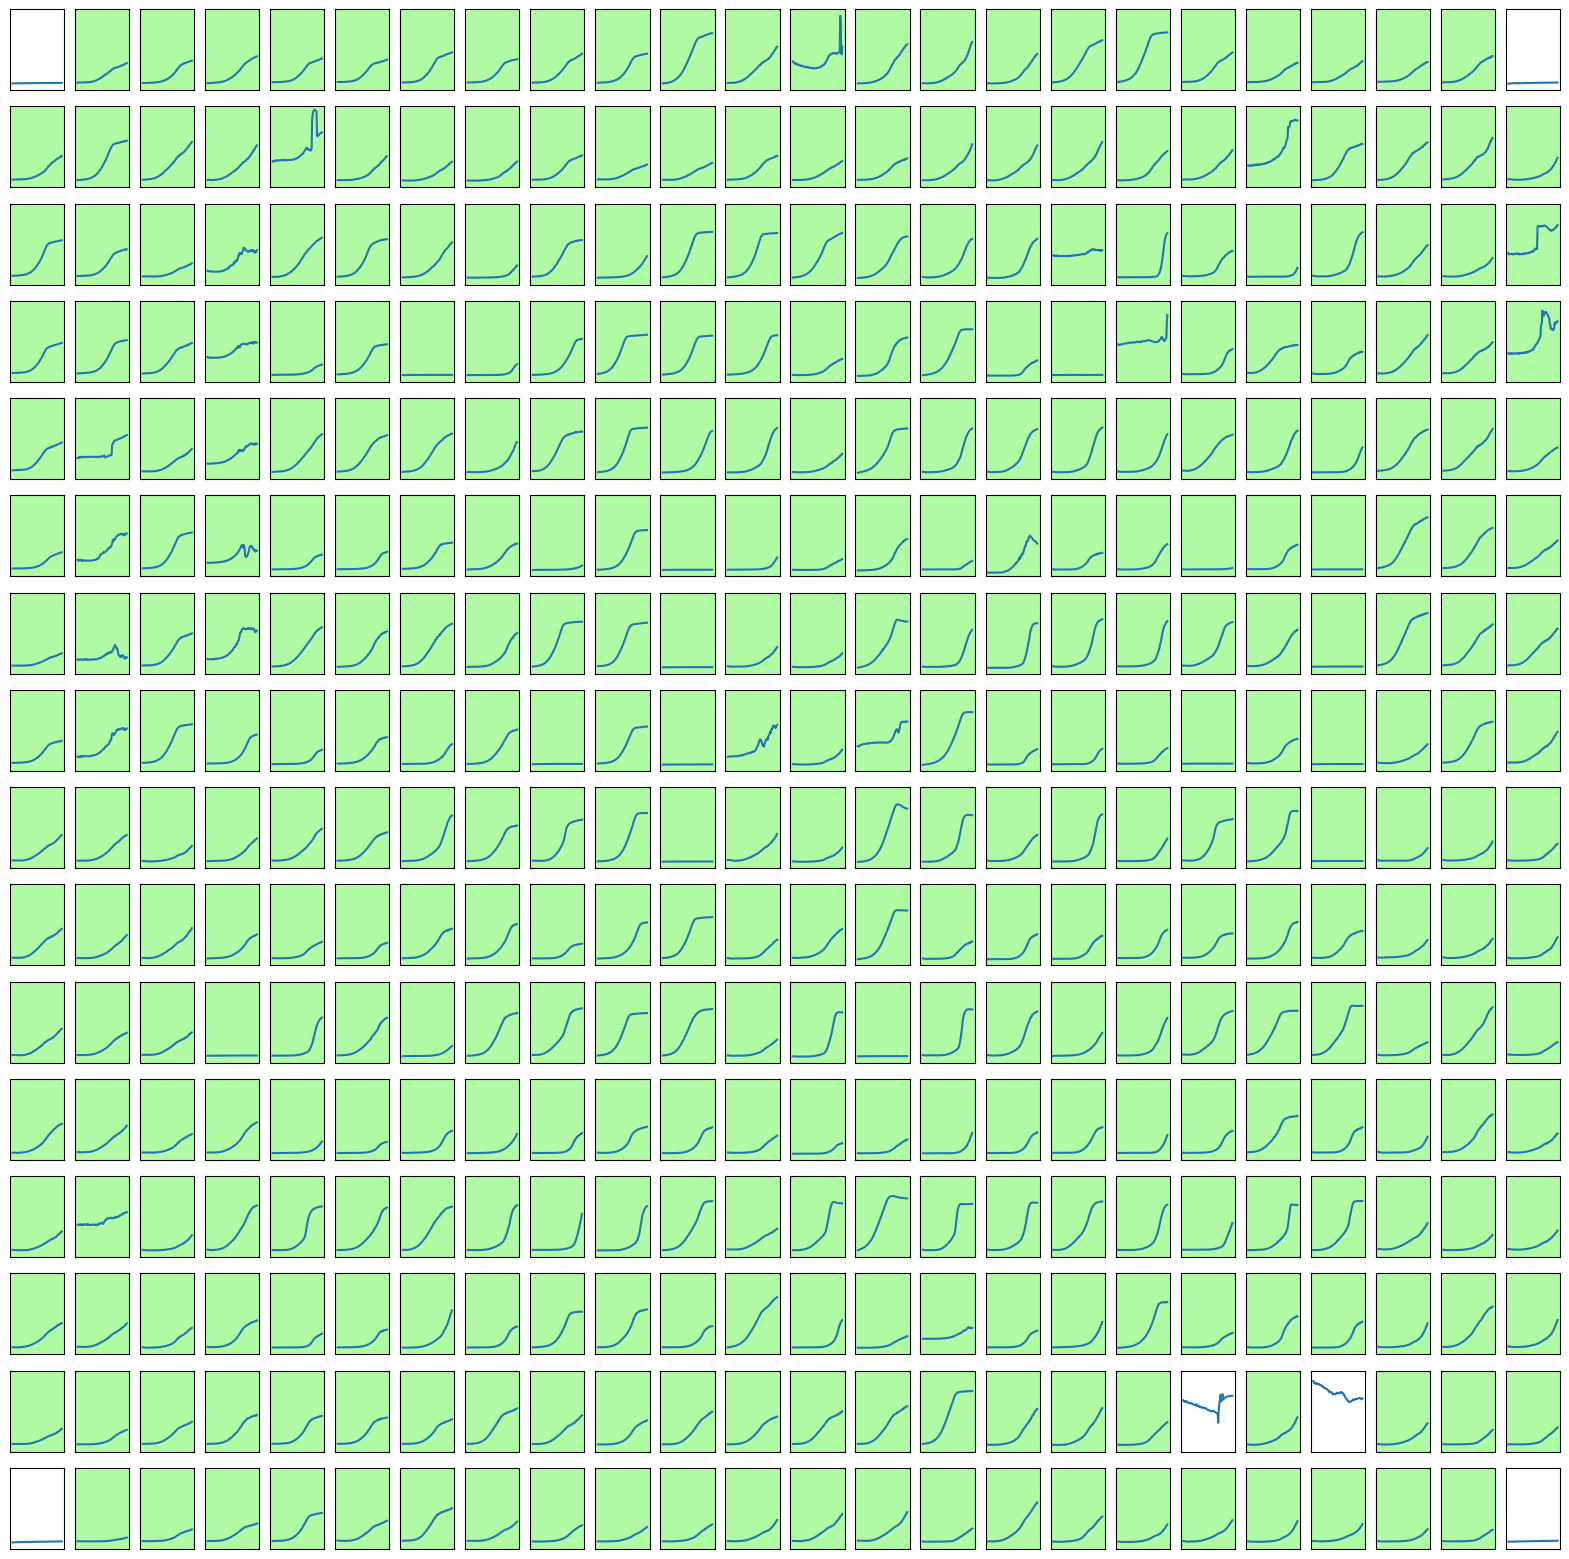

In [17]:
pp.graph_df(df2, l2)

In [18]:
with open("1C.txt") as f:
    string3 = f.read()
l3 = string3.split()
l3 = list(set(l3))
len(l3)

378

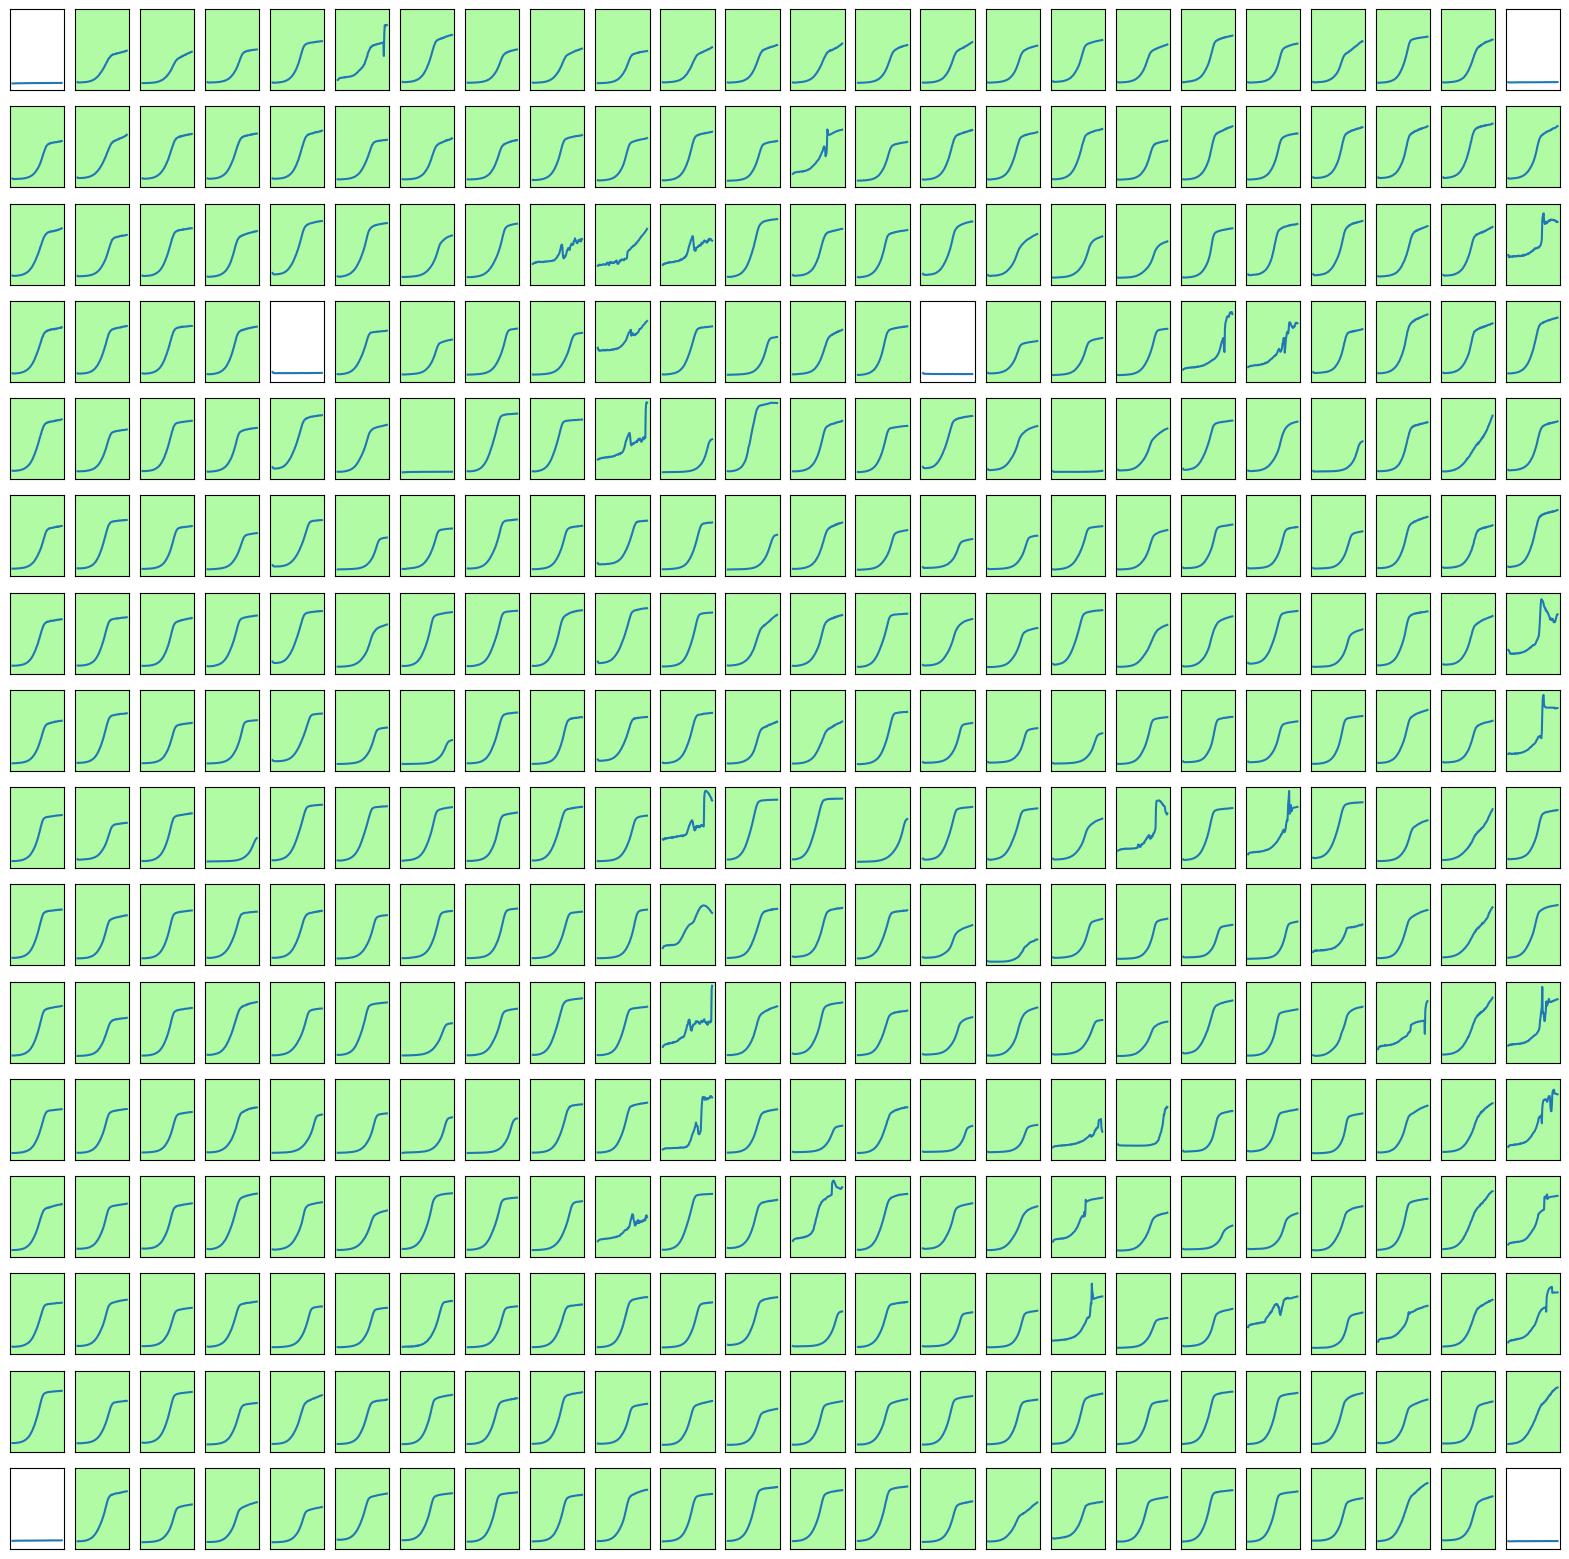

In [19]:
pp.graph_df(df3, l3)

In [20]:
with open("1D.txt") as f:
    string4 = f.read()
l4 = string4.split()
l4 = list(set(l4))
len(l4)

380

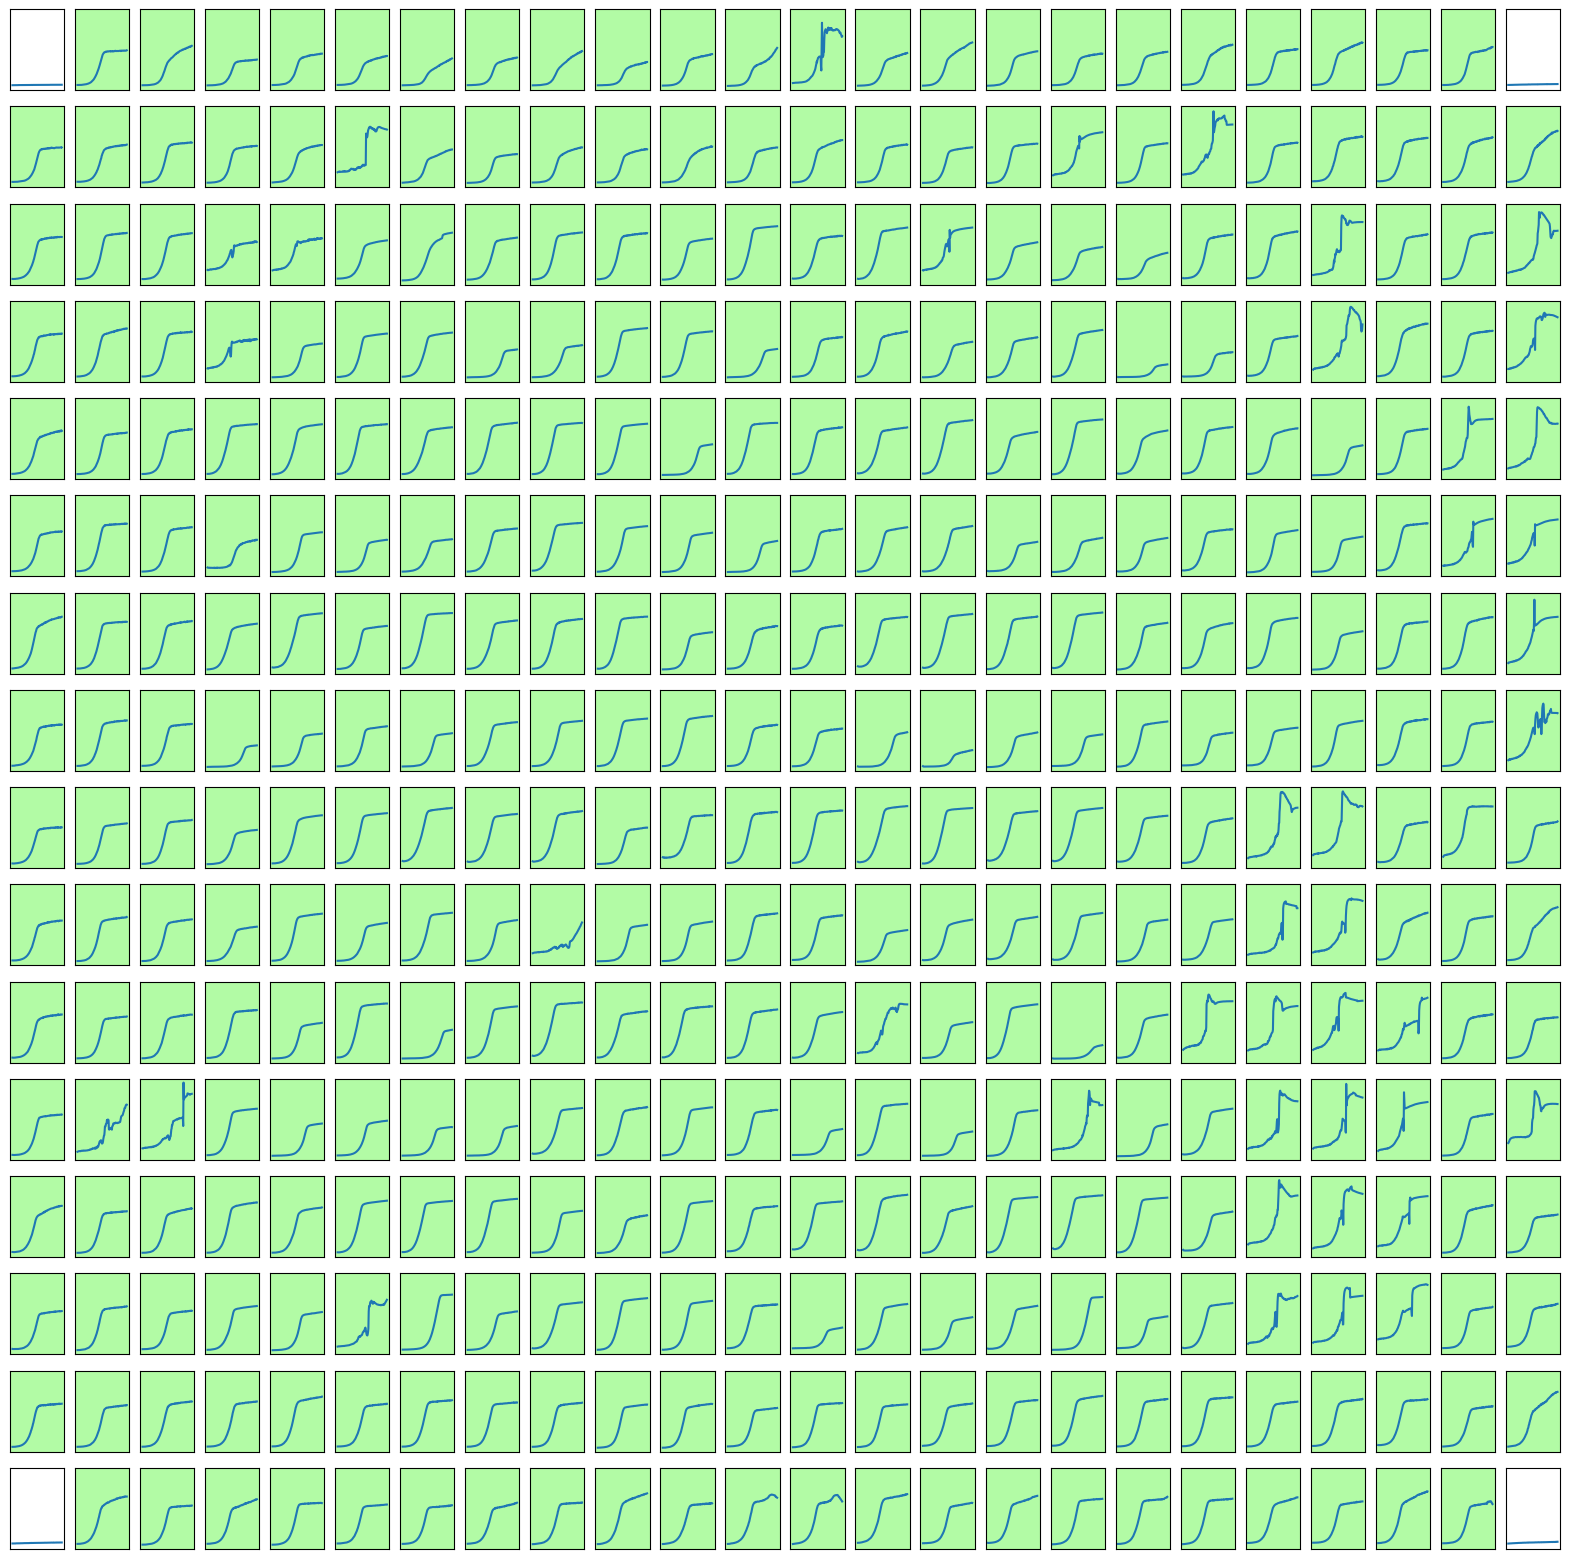

In [21]:
pp.graph_df(df4, l4)

In [22]:
with open("2A.txt") as f:
    string5 = f.read()
l5 = string5.split()
l5 = list(set(l5))
len(l5)

349

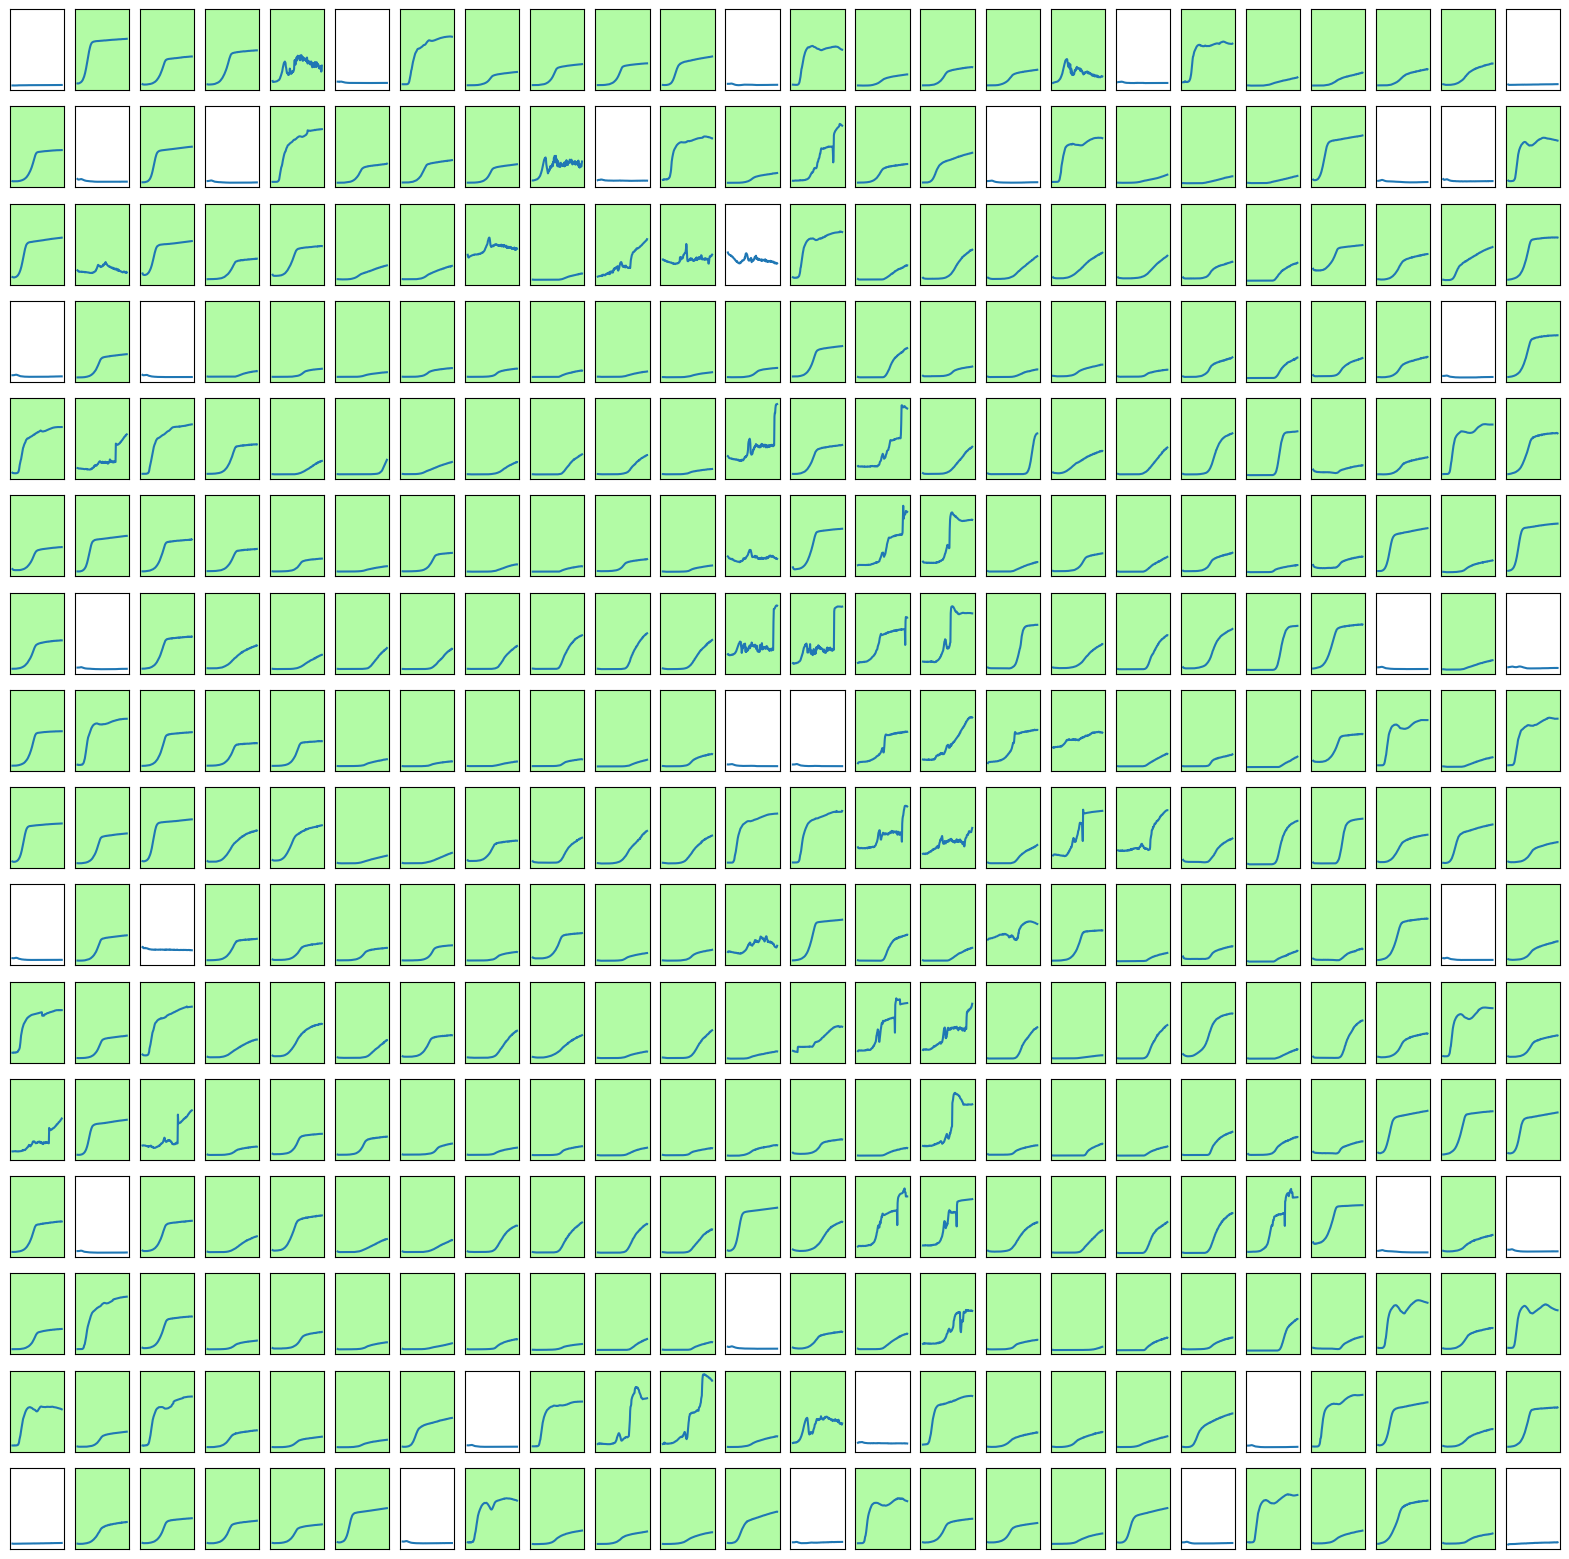

In [23]:
pp.graph_df(df5, l5)

In [24]:
with open("2B.txt") as f:
    string6 = f.read()
l6 = string6.split()
l6 = list(set(l6))
len(l6)

353

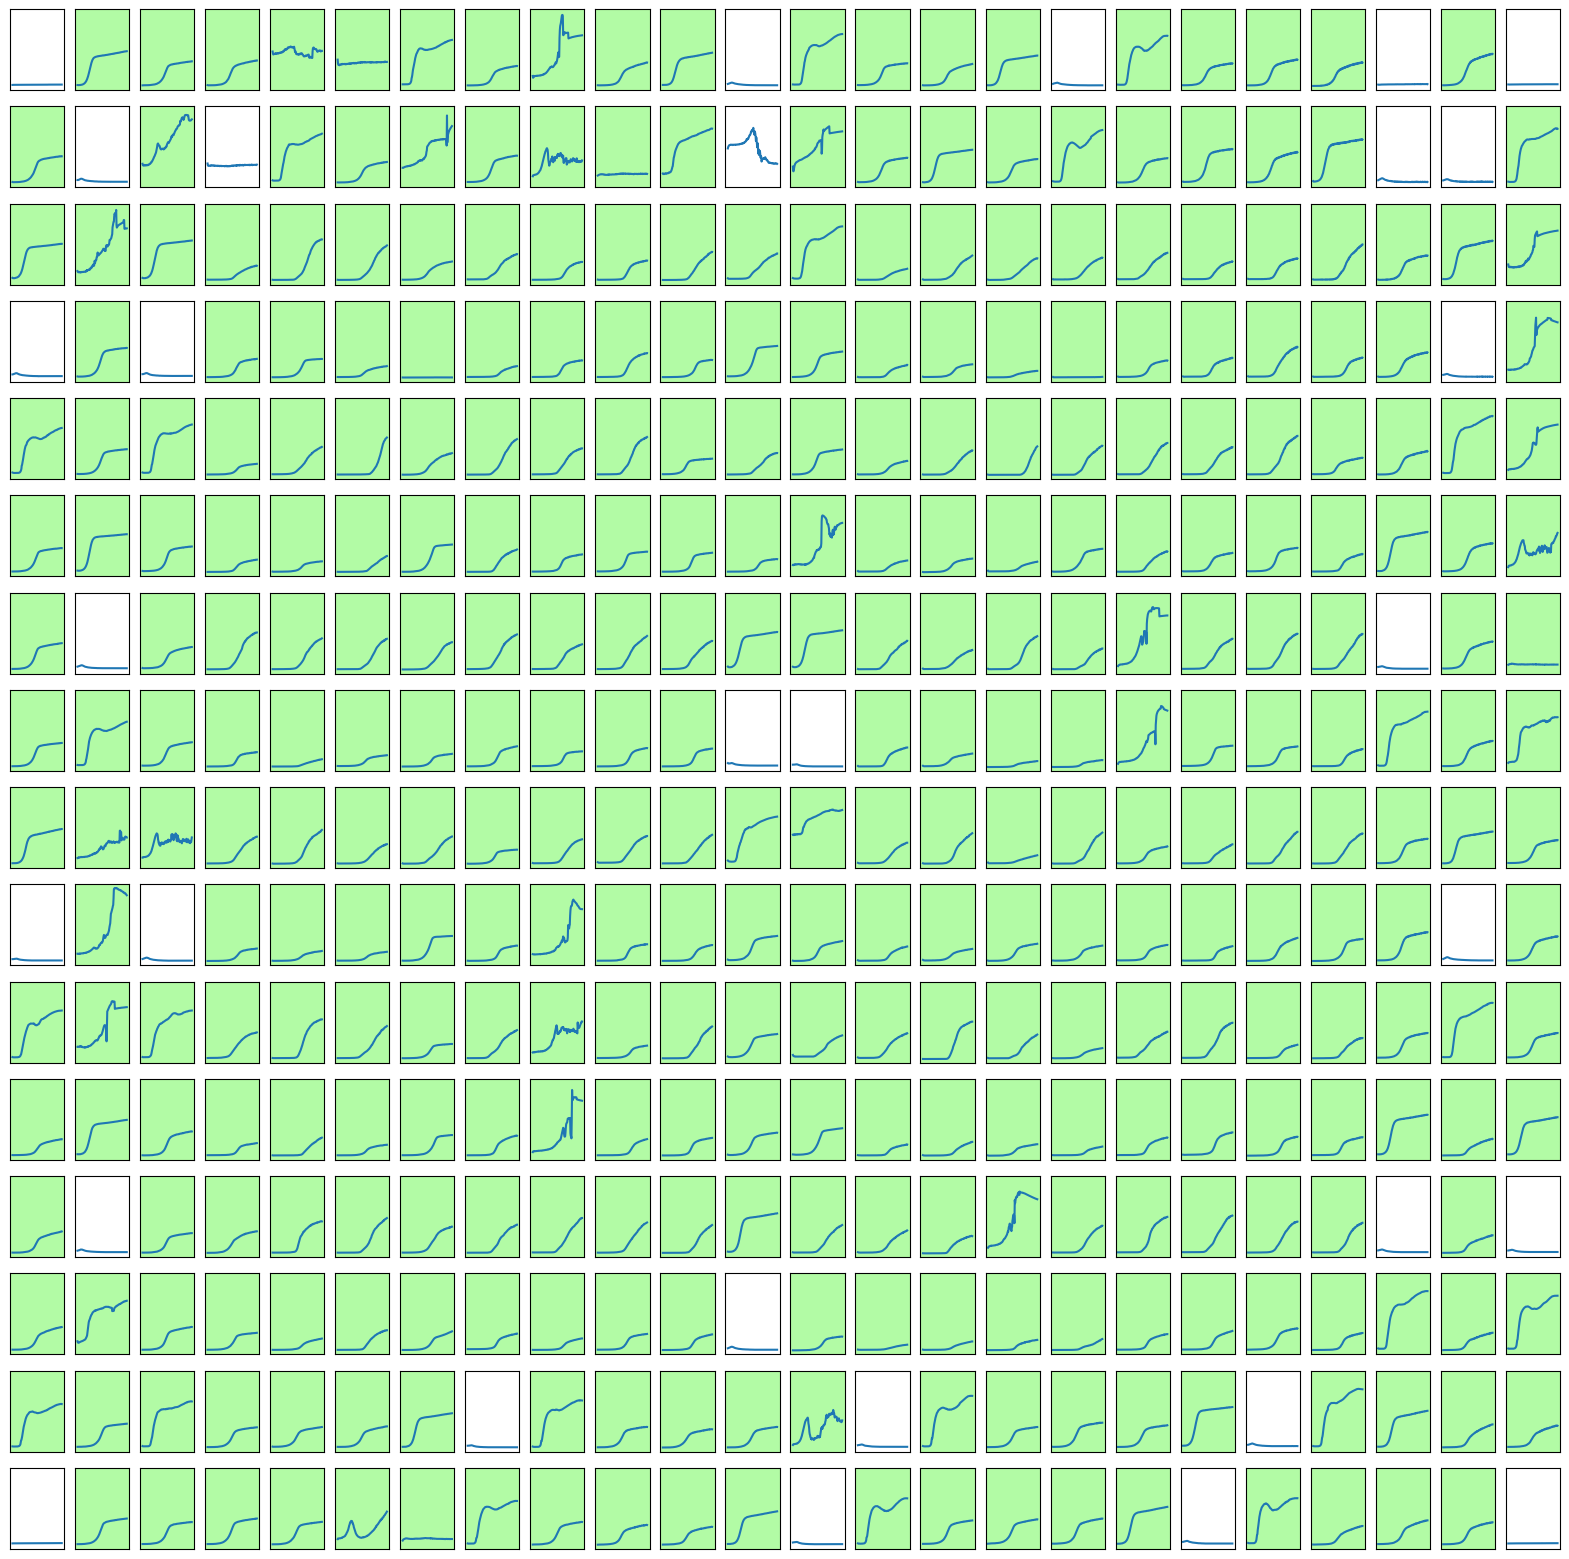

In [25]:
pp.graph_df(df6,l6)

In [26]:
with open("2C.txt") as f:
    string7 = f.read()
l7 = string7.split()
l7 = list(set(l7))
len(l7)

367

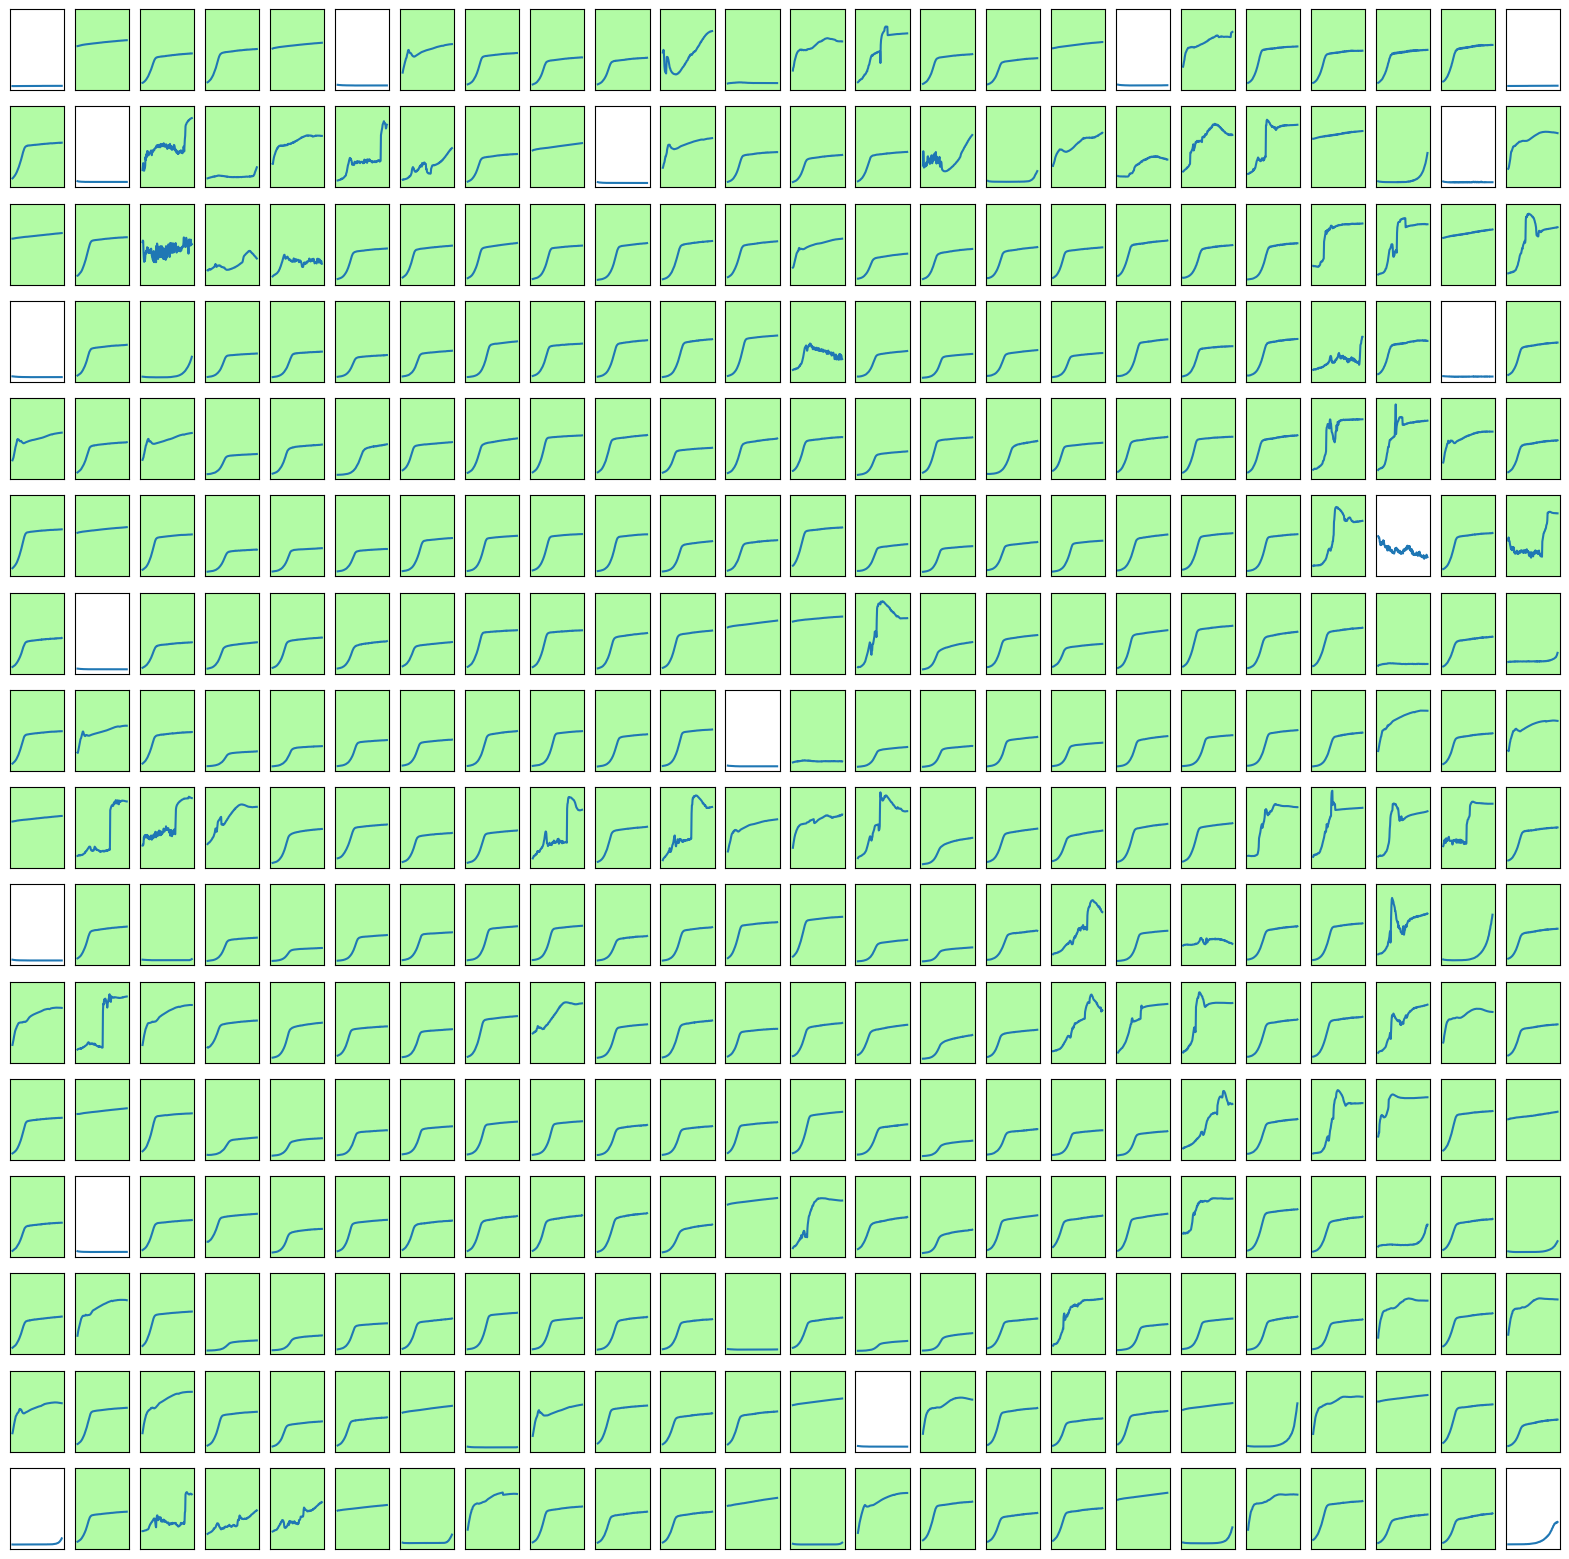

In [27]:
pp.graph_df(df7, l7)

In [28]:
with open("2D.txt") as f:
    string8 = f.read()
l8 = string8.split()
l8 = list(set(l8))
len(l8)

352

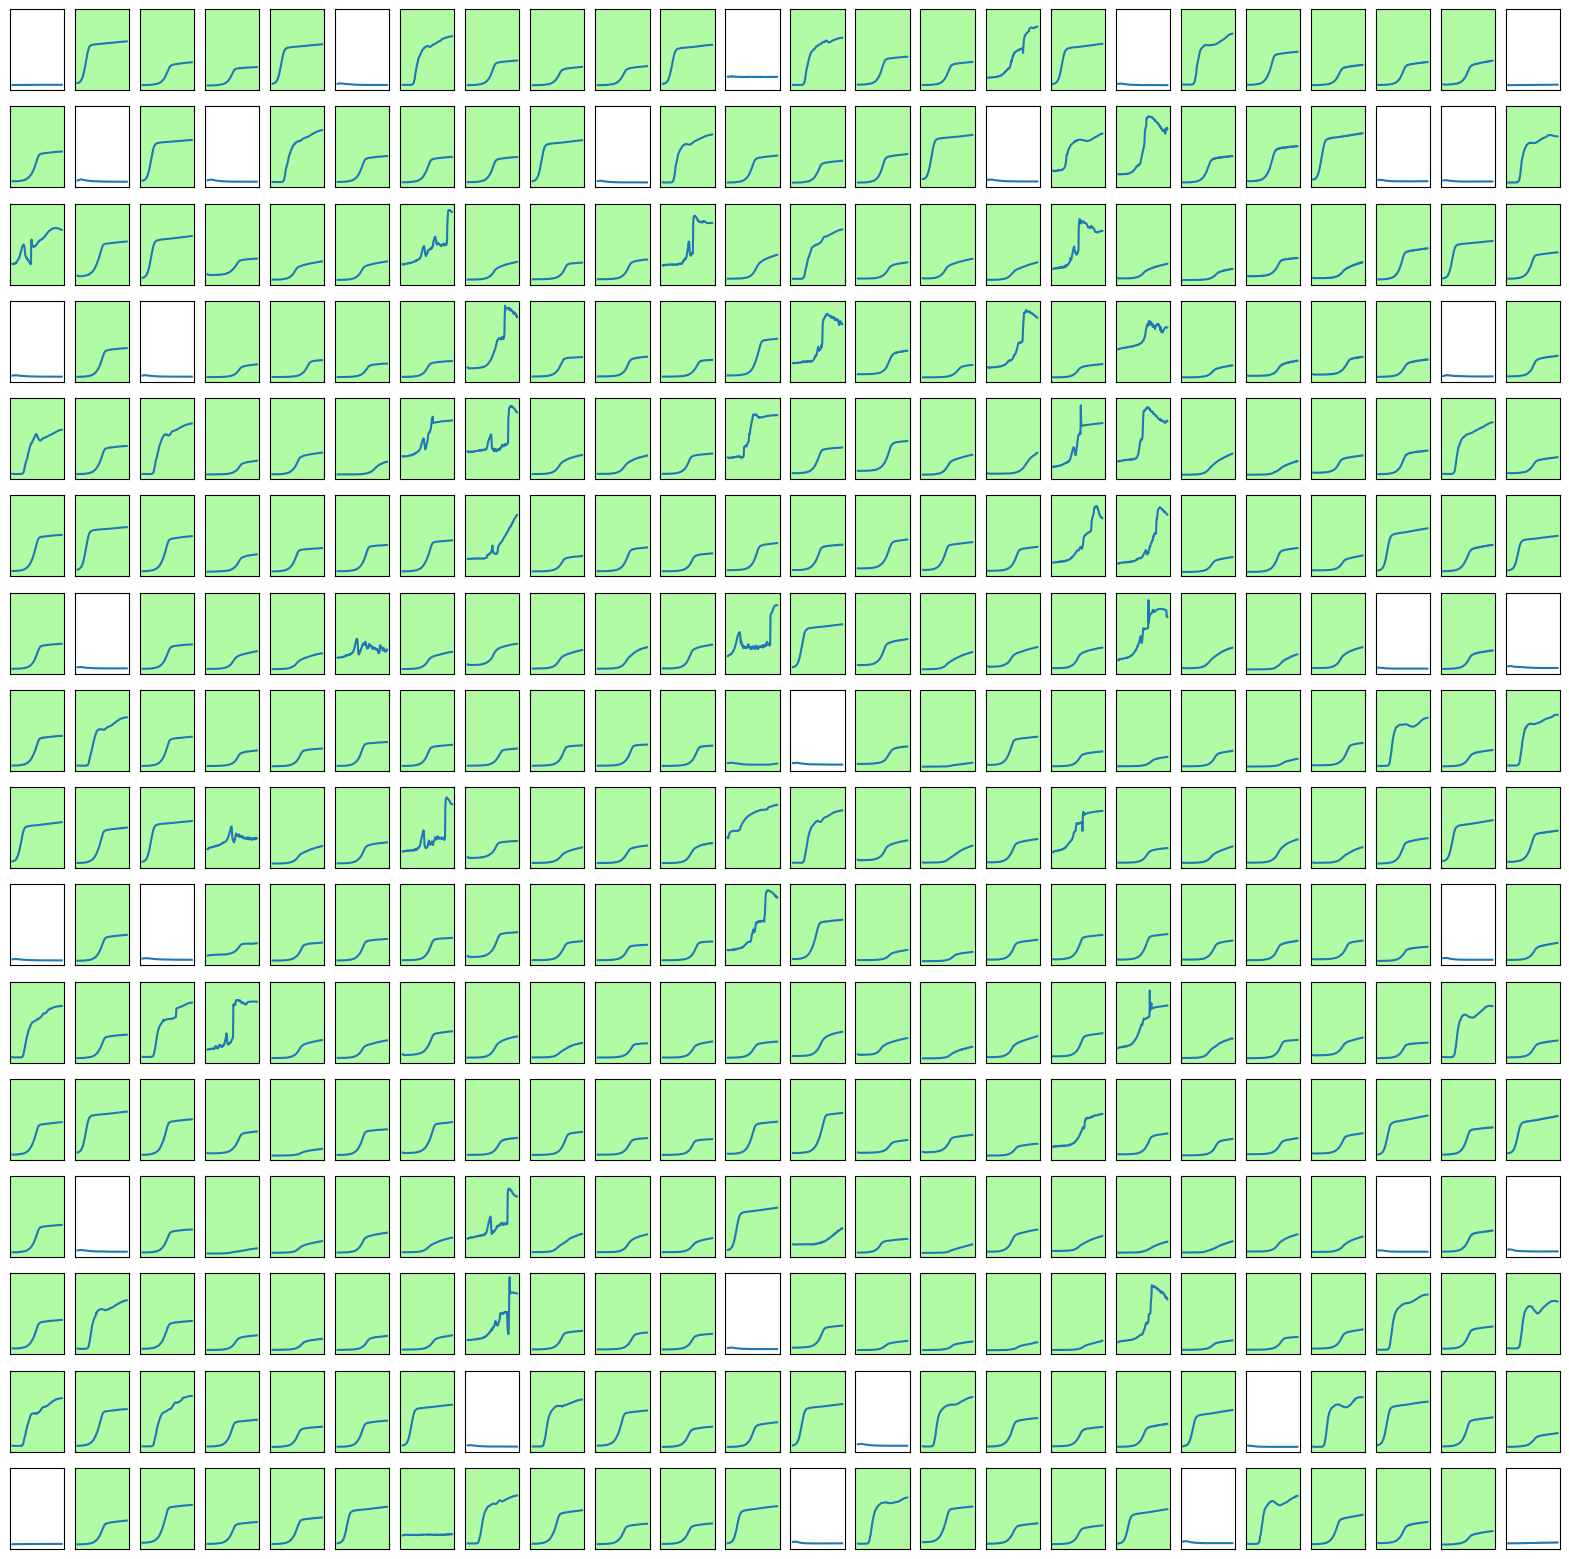

In [29]:
pp.graph_df(df8,l8)

In [30]:
with open("3A.txt") as f:
    string9 = f.read()
l9 = string9.split()
l9 = list(set(l9))
len(l9)

275

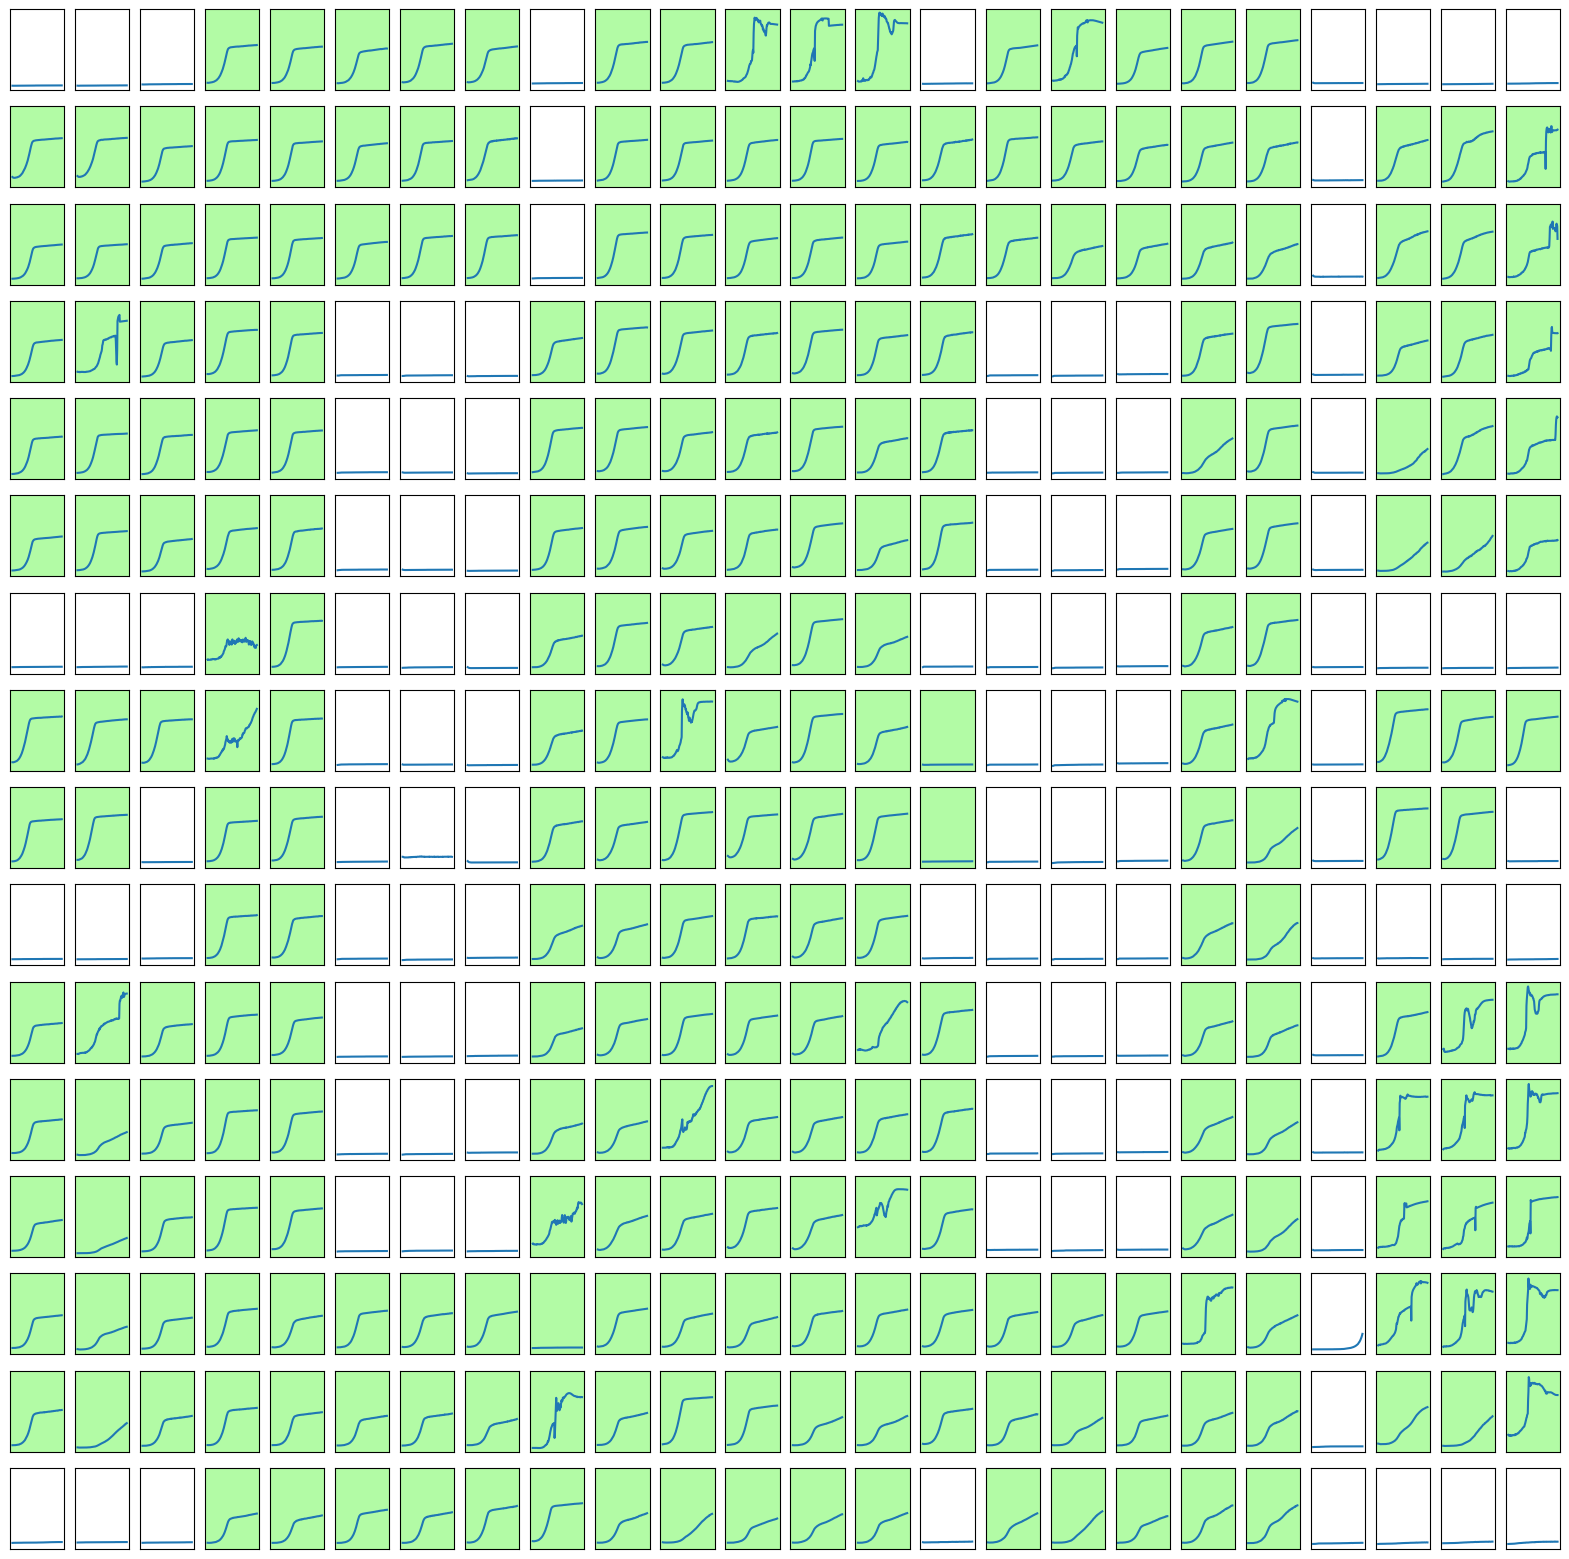

In [31]:
pp.graph_df(df9, l9)